This notebook splits the data into training and testing set for each user such that 80% ratings are in training and 20% are for testing.

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('../0_data/input/movies.csv', converters={"genres": literal_eval})
ratings = pd.read_csv('../0_data/input/ratings.csv')

print('movies: ', movies.shape)
print('ratings: ', ratings.shape)

print(movies.dtypes)
print(ratings.dtypes)


movies:  (45463, 3)
ratings:  (99810, 4)
tmdbId             int64
original_title    object
genres            object
dtype: object
userId         int64
tmdbId         int64
rating       float64
timestamp      int64
dtype: object


In [3]:
movies.head(5)

,tmdbId,original_title,genres
0,862,Toy Story,"[Animation, Comedy, Family]"
1,8844,Jumanji,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,"[Romance, Comedy]"
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,[Comedy]


In [4]:
ratings.head(5)

,userId,tmdbId,rating,timestamp
0,1,9909,2.5,1260759144
1,7,9909,3.0,851868750
2,31,9909,4.0,1273541953
3,32,9909,4.0,834828440
4,36,9909,3.0,847057202


In [5]:
df = pd.merge(ratings, movies, on = 'tmdbId' , how = 'left')
df = df.drop('original_title', axis = 1)
df.head(5)

,userId,tmdbId,rating,timestamp,genres
0,1,9909,2.5,1260759144,"[Drama, Crime]"
1,7,9909,3.0,851868750,"[Drama, Crime]"
2,31,9909,4.0,1273541953,"[Drama, Crime]"
3,32,9909,4.0,834828440,"[Drama, Crime]"
4,36,9909,3.0,847057202,"[Drama, Crime]"


In [6]:
df.shape

(99850, 5)

In [7]:
# df['genres'] = df['genres'].apply(lambda d: d if isinstance(d, list) else [])

In [8]:
df.head()

,userId,tmdbId,rating,timestamp,genres
0,1,9909,2.5,1260759144,"[Drama, Crime]"
1,7,9909,3.0,851868750,"[Drama, Crime]"
2,31,9909,4.0,1273541953,"[Drama, Crime]"
3,32,9909,4.0,834828440,"[Drama, Crime]"
4,36,9909,3.0,847057202,"[Drama, Crime]"


In [9]:
rating_count = (ratings.groupby('rating').rating.count()).to_dict()
rating_count

{0.5: 1097,
 1.0: 3322,
 1.5: 1685,
 2.0: 7263,
 2.5: 4446,
 3.0: 20039,
 3.5: 10512,
 4.0: 28705,
 4.5: 7698,
 5.0: 15043}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


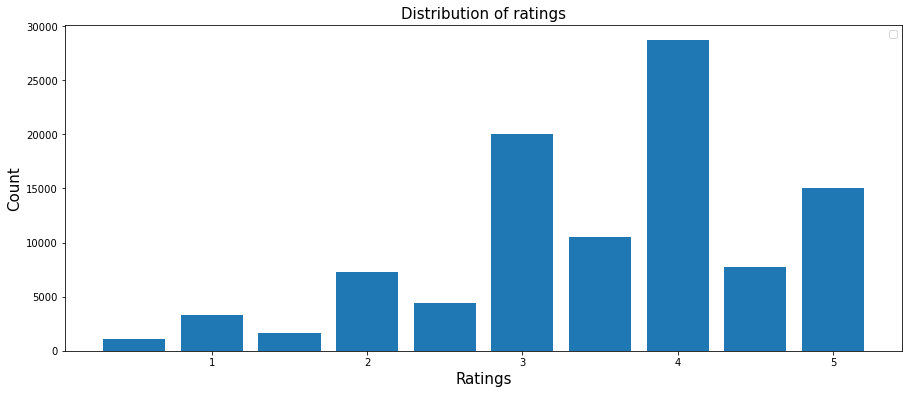

In [10]:
ratingg = list(rating_count.keys())
countt = list(rating_count.values())
  
fig = plt.figure(figsize = (15, 6))
 
# creating the bar plot
plt.bar(ratingg, countt, width = 0.4)
 
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of ratings', loc='center', fontsize=15)

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


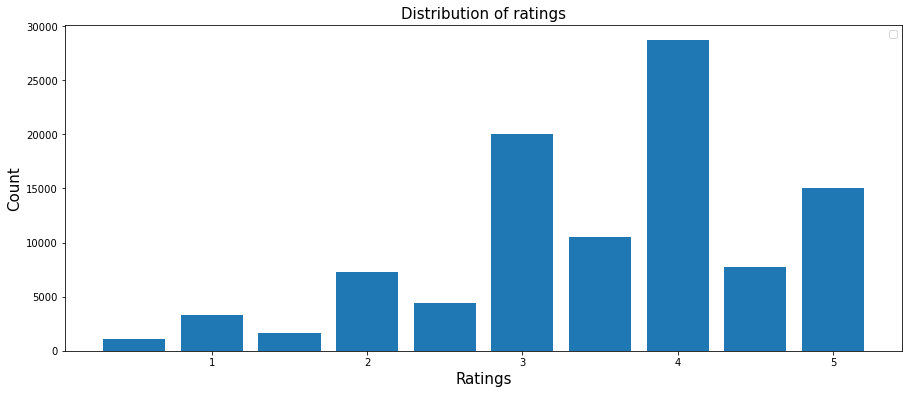

In [11]:
ratingg = list(rating_count.keys())
countt = list(rating_count.values())
  
fig = plt.figure(figsize = (15, 6))
 
# creating the bar plot
plt.bar(ratingg, countt, width = 0.4)
 
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of ratings', loc='center', fontsize=15)

plt.legend()
plt.show()

In [12]:
sum(np.multiply(ratingg, countt))/sum(countt)

3.5429716461276426

In [13]:
dict_rating_numberofuser = ratings.groupby('userId').rating.count().to_dict()

In [14]:
rating_numberofuser = pd.DataFrame(dict_rating_numberofuser.items(), columns=['userID', 'count'])
rating_numberofuser

,userID,count
0,1,20
1,2,75
2,3,51
3,4,204
4,5,100
...,...,...
666,667,68
667,668,19
668,669,37
669,670,31


In [15]:
dict_rating_numberofuser_final = rating_numberofuser.groupby('count').userID.count().to_dict()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


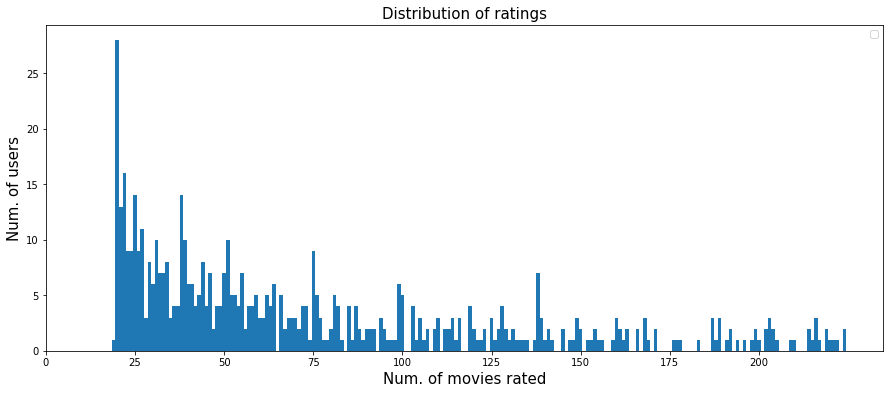

In [16]:
num_film = list(dict_rating_numberofuser_final.keys())
num_user = list(dict_rating_numberofuser_final.values())

num_film_filtered = [num_film[i] for i in range(len(num_film)) if num_film[i] < 225]
num_user_filtered = [num_user[i] for i in range(len(num_film)) if num_film[i] < 225]
  
fig = plt.figure(figsize = (15, 6))
 
# creating the bar plot
plt.bar(num_film_filtered, num_user_filtered, width = 1)
 
plt.xlabel('Num. of movies rated', fontsize=15)
plt.ylabel('Num. of users', fontsize=15)

plt.xticks(np.arange(0, 225, 25))

plt.title('Distribution of ratings', loc='center', fontsize=15)

plt.legend()
plt.show()

In [17]:
len(ratings)/len(ratings['tmdbId'].unique())

11.059279778393352